In [110]:
using DataFrames
using Plots
using StatsPlots
using CSV
using Query
using Polynomials: fit as poly_fit

In [2]:
files = "../data/" .* ["power2.csv", "power3.csv", "power4.csv", "power5.csv"]

4-element Vector{String}:
 "../data/power2.csv"
 "../data/power3.csv"
 "../data/power4.csv"
 "../data/power5.csv"

In [3]:
function concatenate(frames)
    reduce(vcat, frames)
end

concatenate (generic function with 1 method)

In [89]:
data = CSV.read.(files, [DataFrame]) |> concatenate

Row,power,algorithm,time,additions,multiplications
,Float64,Float64,Float64,Float64,Float64
1,2.0,1.0,1.43539,72532.0,19217.0
2,2.0,2.0,0.000221117,12161.0,54.0
3,2.0,0.0,0.0395141,110592.0,110592.0
4,3.0,1.0,0.0691101,0.0,0.0
5,3.0,2.0,0.0103466,0.0,0.0
6,3.0,0.0,0.0286592,0.0,0.0
7,4.0,1.0,18.6316,0.0,0.0
8,4.0,2.0,0.655219,0.0,0.0
9,4.0,0.0,4.09979,0.0,0.0


In [86]:
additions_recipe = Dict(
    0.0 => x -> 4 * (x ^ 5 ÷ 2) ^ 2,
    1.0 => x -> 18 * (x ^ 5 ÷ 2) ^ 2,
    2.0 => x -> 200 * (x ^ 5 ÷ 5) ^ 2
)

function get_additions(power, algorithm)
    additions_recipe[algorithm](power)
end

get_additions (generic function with 1 method)

In [87]:
multiplications_recipe = Dict(
    0.0 => x -> 8 * (x ^ 5 ÷ 2) ^ 3,
    1.0 => x -> 7 * (x ^ 5 ÷ 2) ^ 3,
    2.0 => x -> 76 * (x ^ 5 ÷ 5) ^ 3
)

function get_multiplications(power, algorithm)
    multiplications_recipe[algorithm](power)
end

get_multiplications (generic function with 1 method)

In [90]:
data = data |>
    @mutate(
        additions = _.additions == 0.0 ? get_additions(_.power, _.algorithm) : _.additions,
        multiplications = _.multiplications == 0.0 ? get_multiplications(_.power, _.algorithm) : _.multiplications 
    ) |>
    DataFrame

Row,power,algorithm,time,additions,multiplications
,Any,Any,Any,Any,Any
1,2.0,1.0,1.43539,72532.0,19217.0
2,2.0,2.0,0.000221117,12161.0,54.0
3,2.0,0.0,0.0395141,110592.0,110592.0
4,3.0,1.0,0.0691101,263538.0,1.24009e7
5,3.0,2.0,0.0103466,460800.0,8.40499e6
6,3.0,0.0,0.0286592,58564.0,1.41725e7
7,4.0,1.0,18.6316,4.71859e6,9.39524e8
8,4.0,2.0,0.655219,8.3232e6,6.45214e8
9,4.0,0.0,4.09979,1.04858e6,1.07374e9


In [91]:
data[!, :] = convert.(Float64, data[!, :])

Row,power,algorithm,time,additions,multiplications
,Float64,Float64,Float64,Float64,Float64
1,2.0,1.0,1.43539,72532.0,19217.0
2,2.0,2.0,0.000221117,12161.0,54.0
3,2.0,0.0,0.0395141,110592.0,110592.0
4,3.0,1.0,0.0691101,263538.0,1.24009e7
5,3.0,2.0,0.0103466,460800.0,8.40499e6
6,3.0,0.0,0.0286592,58564.0,1.41725e7
7,4.0,1.0,18.6316,4.71859e6,9.39524e8
8,4.0,2.0,0.655219,8.3232e6,6.45214e8
9,4.0,0.0,4.09979,1.04858e6,1.07374e9


In [118]:
function fit(df, attribute, degree)
    poly_fit(df[!, :power], df[!, attribute], degree)
end

fit (generic function with 2 methods)

In [31]:
name = Dict(
    0.0 => "Binet",
    1.0 => "Strassen",
    2.0 => "AI"
)

Dict{Float64, String} with 3 entries:
  0.0 => "Binet"
  2.0 => "AI"
  1.0 => "Strassen"

In [116]:
poly_fit(data[!, :power], data[!, :time], 3)

Polynomial(-2217.9184550393347 + 2409.9706808745586*x - 837.3800538725011*x^2 + 93.49862725561123*x^3)

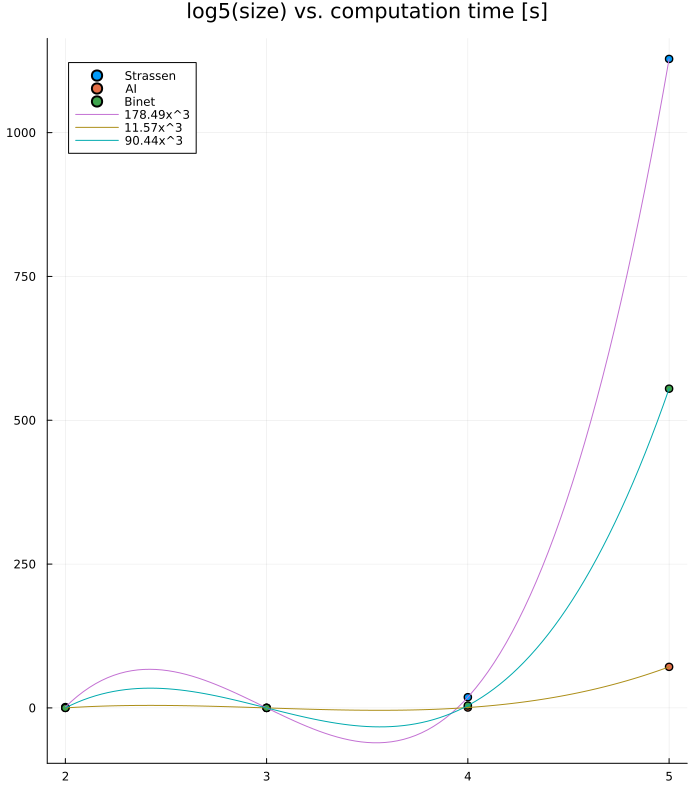

In [129]:
time_plt = scatter(size=(700, 800), title="log5(size) vs. computation time [s]")

data |>
    @groupby(_.algorithm) .|>
    @df scatter!(time_plt, :power, :time, label=name[:algorithm[1]])

data |> 
    @groupby(_.algorithm) .|>
    @df(plot!(time_plt, poly_fit(:power, :time, 3), extrema(:power)..., label="$(round(poly_fit(:power, :time, 3)[3], digits=2))x^3"))

time_plt |> display

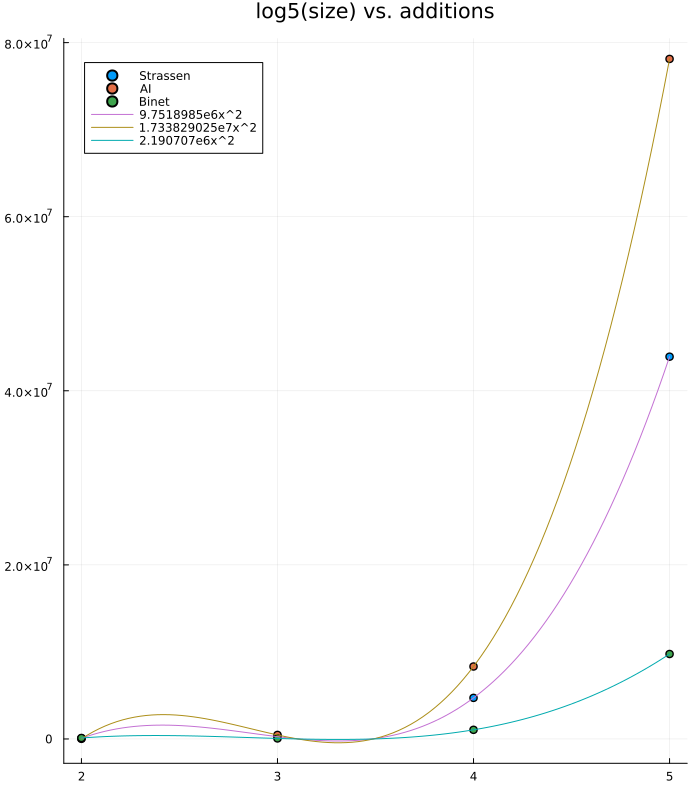

In [131]:
add_plt = scatter(size=(700, 800), title="log5(size) vs. additions")

data |>
    @groupby(_.algorithm) .|>
    @df scatter!(add_plt, :power, :additions, label = map(i -> name[i], :algorithm) |> unique |> first)

data |> 
    @groupby(_.algorithm) .|>
    @df(plot!(add_plt, poly_fit(:power, :additions, 3), extrema(:power)..., label="$(round(poly_fit(:power, :additions, 2)[2], digits=2))x^2"))

add_plt |> display

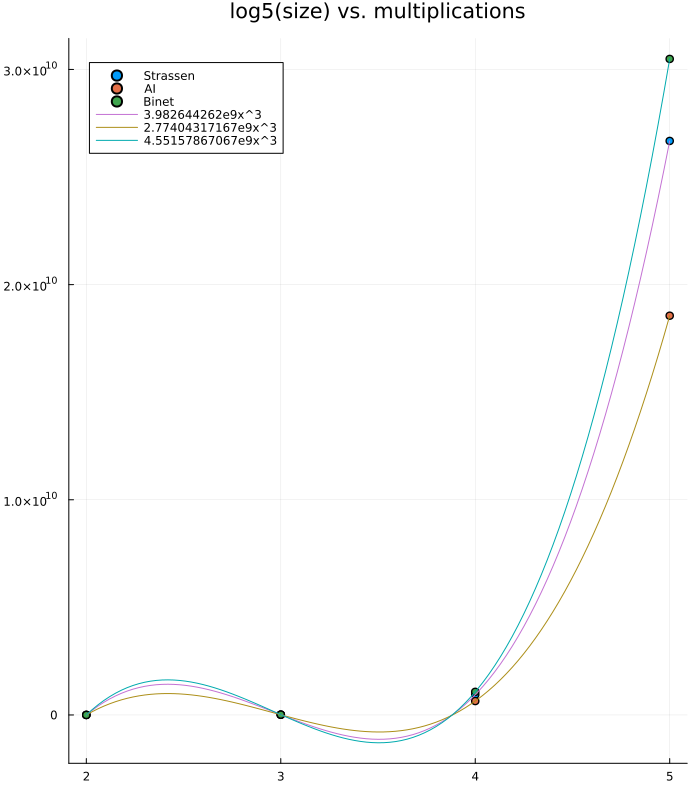

In [132]:
mul_plt = scatter(size=(700, 800), title="log5(size) vs. multiplications")
data |>
    @groupby(_.algorithm) .|>
    @df scatter!(mul_plt, :power, :multiplications, label = map(i -> name[i], :algorithm) |> unique |> first)


data |> 
    @groupby(_.algorithm) .|>
    @df(plot!(mul_plt, poly_fit(:power, :multiplications, 3), extrema(:power)..., label="$(round(poly_fit(:power, :multiplications, 3)[3], digits=2))x^3"))

mul_plt |> display

In [133]:
plot(time_plt, add_plt, mul_plt, layout=(1, 3), size=(1600, 800))
savefig("../images/plot.png")

"/home/integraledelebesgue/Studies/V/MatrixAlgorithms/Lab1/images/plot.png"